# Homework 2

## Apartment Prices

How much does an apartment in Ekhagen cost per square metre? Let's find out!

In [100]:
import pandas as pd
booli_data = pd.read_csv('Booli_sold.csv')

booli_data['ppsqm'] = booli_data['listPrice'] / booli_data['livingArea']

top_5 = booli_data.sort_values(by='ppsqm', ascending=False).head(5)
top_5 = top_5[['listPrice', 'rent', 'livingArea', 'rooms', 'ppsqm']].round(2)
top_5.columns = ['Price', 'Rent', 'Area', 'Rooms', 'Price/sqm']

print(top_5)

      Price    Rent  Area  Rooms  Price/sqm
10  2295000  1743.0  29.0    1.0   79137.93
50  1890000  1464.0  24.0    1.0   78750.00
54  1795000  1374.0  23.0    1.0   78043.48
49  3495000  3052.0  47.0    2.0   74361.70
24  2500000  1400.0  35.0    1.0   71428.57


The top 5 square metre prices lie between 71 400 SEK and 79 200 SEK.

In [106]:
average_ppsqm = round(booli_data['ppsqm'].mean(), 2)
print(f"Average Price/sqm: {average_ppsqm}")

Average Price/sqm: 54127.44


The average price per square metre in Ekhagen is about 54 100 SEK.

In [78]:
ppsqm_room = booli_data.groupby('rooms')['ppsqm'].mean().round(2).sort_values(ascending=False)

ppsqm_room = ppsqm_room.reset_index()
ppsqm_room.columns = ['Rooms', 'Price/sqm']

print(ppsqm_room)

   Rooms  Price/sqm
0    1.0   63532.79
1    1.5   54600.83
2    2.5   53896.53
3    2.0   53234.21
4    5.0   53091.39
5    4.0   52979.97
6    3.5   52815.11
7    3.0   50501.68
8    6.0   46557.41
9    4.5   43815.79


From the table above it seems that smaller apartments have higher square metre prices than bigger ones.

## Swedish Election 2018

How many people in Stockholm voted during the election?

In which municipality did the social democratic party get the most votes?

Which municipalities had the highest participation?

In [38]:
election_data = pd.read_csv('2018_R_per_kommun.csv', delimiter=';', decimal=',')

stockholm_votes = election_data[election_data['LÄNSKOD'] == 1]['RÖSTER GILTIGA'].sum()
print(f"Total legitimate votes in Stockholm: {stockholm_votes}")

Total legitimate votes in Stockholm: 1426237


The total legitimate votes in Stockholm were 1 426 237 people.

In [121]:
top_S = election_data.loc[election_data['S'].idxmax()]
print(top_S[['KOMMUNNAMN', 'S']])

KOMMUNNAMN    Munkfors
S                52.18
Name: 188, dtype: object


The social democratic party got the highest percentage of votes in Munkfors municipality.

In [42]:
top_3 = election_data.sort_values(by='VALDELTAGANDE', ascending=False).head(3)
print(top_3[['KOMMUNNAMN', 'VALDELTAGANDE']])

    KOMMUNNAMN  VALDELTAGANDE
103      Lomma          93.86
59        Habo          93.35
98    Vellinge          93.13


The three municipalities with the highest participation were Lomma, Habo and Vellinge.

## Predicting Strokes

Does smoking seem to be related with strokes?

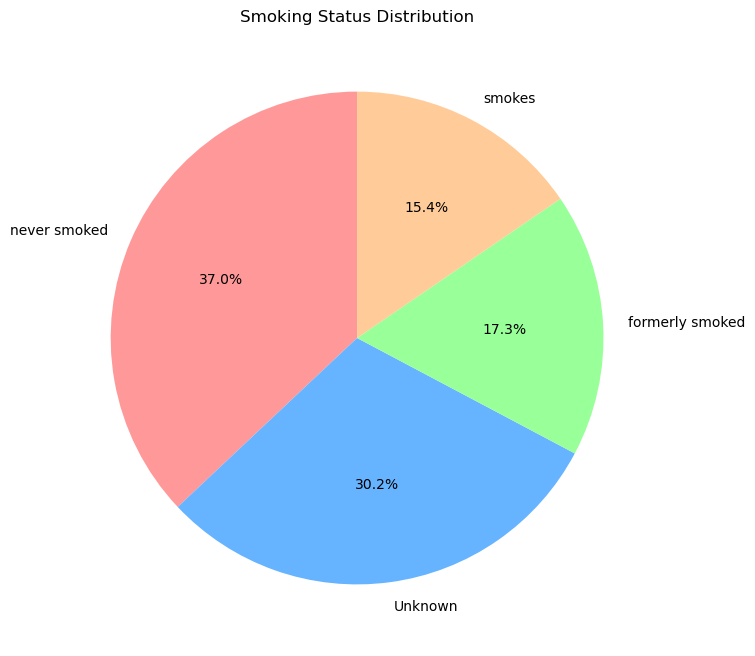

In [62]:
stroke_data = pd.read_csv('stroke-data.csv')

import matplotlib.pyplot as plt

smoking_counts = stroke_data['smoking_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Smoking Status Distribution')
plt.show()

Since the different groups seem to be quite evenly distributed, no obvious correlation can be seen between smoking status and stroke.